# Assignment 12 - Neural Networks image recognition
Use both MLNN and the ConvNet to solve the following problem.

1. Add random noise (i.e. `np.random.normal`) to the images in training and testing. Make sure each image gets a different noise feature added to it. Inspect by printing out an image. 
2. Compare the loss/accuracy (train, val) after N epochs for both MLNN and ConvNet with and without noise. 
3. Vary the amount of noise (multiply `np.random.normal` by a factor) and keep track of the accuracy and loss (for training and validation) and plot these results.

# Neural Networks - Image Recognition 

In [7]:
import keras
from keras import backend
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print("Success")

Success


## Multi Layer Neural Network
Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).

60000 train samples
10000 test samples


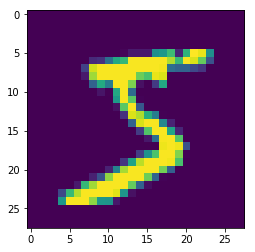

In [8]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
plt.imshow(x_train[0])

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

In [9]:
epochs = 20
batch_size = 128
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.2454 

## Conv Net
Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).


In [10]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [11]:
batch_size = 128
num_classes = 10
epochs = 12

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 111s 2ms/step - loss: 0.2741 - acc: 0.9166 - val_loss: 0.0577 - val_acc: 0.9819
Epoch 2/12
60000/60000 [==============================] - 109s 2ms/step - loss: 0.0910 - acc: 0.9728 - val_loss: 0.0428 - val_acc: 0.9858
Epoch 3/12
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0668 - acc: 0.9803 - val_loss: 0.0384 - val_acc: 0.9878
Epoch 4/12
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0547 - acc: 0.9839 - val_loss: 0.0354 - val_acc: 0.9869
Epoch 5/12
60000/60000 [==============================] - 108s 2ms/step - loss: 0.0462 - acc: 0.9864 - val_loss: 0.0322 - val_acc: 0.9896
Epoch 6/12
60000/60000 [==============================] - 108s 2ms/step - loss: 0.0412 - acc: 0.9875 - val_loss: 0.0306 - val_acc: 0.9890
Epoch 7/12
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0365 - acc: 0.9883 - val_loss: 0.0264 - 

In [12]:
## With noise added

60000 train samples
10000 test samples


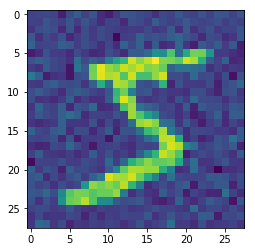

In [13]:
# Adding noise to the image
(noisy_xtrain, noisy_ytrain), (noisy_xtest, noisy_ytest) = mnist.load_data()
noisy_xtrain = noisy_xtrain+np.random.normal(noisy_xtrain, 50)
noisy_xtest = noisy_xtest+np.random.normal(noisy_xtest, 50)
plt.imshow(noisy_xtrain[0])

noisy_xtrain = noisy_xtrain.reshape(60000, 784)
noisy_xtest = noisy_xtest.reshape(10000, 784)
noisy_xtrain = noisy_xtrain.astype('float32')
noisy_xtest = noisy_xtest.astype('float32')
noisy_xtrain /= 255
noisy_xtest /= 255
print(noisy_xtrain.shape[0], 'train samples')
print(noisy_xtest.shape[0], 'test samples')

In [14]:
epochs = 20
batch_size = 128
num_classes = 10

noisy_ytrain = keras.utils.to_categorical(noisy_ytrain, num_classes)
noisy_ytest = keras.utils.to_categorical(noisy_ytest, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(noisy_xtrain, noisy_ytrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(noisy_xtest, noisy_ytest))
score50 = model.evaluate(noisy_xtest, noisy_ytest, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.2629 

In [15]:
parameters = range(0, 100, 10)
epochs = 20
batch_size = 128
num_classes = 10
allscores=[]

for x in parameters:
    (noisy_xtrain, noisy_ytrain), (noisy_xtest, noisy_ytest) = mnist.load_data()
    noisy_xtrain = noisy_xtrain+np.random.normal(noisy_xtrain, x)
    noisy_xtest = noisy_xtest+np.random.normal(noisy_xtest, x)
    print(x)

    noisy_xtrain = noisy_xtrain.reshape(60000, 784)
    noisy_xtest = noisy_xtest.reshape(10000, 784)
    noisy_xtrain = noisy_xtrain.astype('float32')
    noisy_xtest = noisy_xtest.astype('float32')
    noisy_xtrain /= 255
    noisy_xtest /= 255
    noisy_ytrain = keras.utils.to_categorical(noisy_ytrain, num_classes)
    noisy_ytest = keras.utils.to_categorical(noisy_ytest, num_classes)

    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    model.summary()

    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

    history = model.fit(noisy_xtrain, noisy_ytrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(noisy_xtest, noisy_ytest))
    x = model.evaluate(noisy_xtest, noisy_ytest, verbose=0)
    allscores.append(x)
    

0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.244

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.2456 - acc: 0.9258 - val_loss: 0.1224 - val_acc: 0.9616
Epoch 2/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.1030 - acc: 0.9688 - val_loss: 0.0872 - val_acc: 0.9725
Epoch 3/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0704 - acc: 0.9780 - val_loss: 0.0847 - val_acc: 0.9772
Epoch 4/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0543 - acc: 0.9832 - val_loss: 0.0865 - val_acc: 0.9775
Epoch 5/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.0441 - acc: 0.9864 - val_loss: 0.0792 - val_acc: 0.9813
Epoch 6/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.0389 - acc: 0.9887 - val_loss: 0.1052 - val_acc: 0.9774
Epoch 7/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.0330 - acc: 0.9900 - val_loss: 0.0879 - val_ac

Epoch 5/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0398 - acc: 0.9880 - val_loss: 0.1175 - val_acc: 0.9741
Epoch 6/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.0327 - acc: 0.9901 - val_loss: 0.1230 - val_acc: 0.9762
Epoch 7/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0274 - acc: 0.9919 - val_loss: 0.1150 - val_acc: 0.9791
Epoch 8/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0231 - acc: 0.9928 - val_loss: 0.1392 - val_acc: 0.9762
Epoch 9/20
60000/60000 [==============================] - 5s 92us/step - loss: 0.0210 - acc: 0.9941 - val_loss: 0.1352 - val_acc: 0.9764
Epoch 10/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0206 - acc: 0.9939 - val_loss: 0.1393 - val_acc: 0.9778
Epoch 11/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0178 - acc: 0.9952 - val_loss: 0.1532 - val_acc: 0.9780
Epoch 12/20
60000/60000 [==============

60000/60000 [==============================] - 6s 93us/step - loss: 0.0201 - acc: 0.9939 - val_loss: 0.1539 - val_acc: 0.9761
Epoch 10/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0183 - acc: 0.9950 - val_loss: 0.1709 - val_acc: 0.9752
Epoch 11/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.0177 - acc: 0.9951 - val_loss: 0.1730 - val_acc: 0.9747
Epoch 12/20
60000/60000 [==============================] - 5s 92us/step - loss: 0.0174 - acc: 0.9951 - val_loss: 0.1857 - val_acc: 0.9746
Epoch 13/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.0137 - acc: 0.9965 - val_loss: 0.2152 - val_acc: 0.9735
Epoch 14/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.0165 - acc: 0.9959 - val_loss: 0.2054 - val_acc: 0.9732
Epoch 15/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.0141 - acc: 0.9965 - val_loss: 0.2098 - val_acc: 0.9756
Epoch 16/20
60000/60000 [====================

60000/60000 [==============================] - 6s 94us/step - loss: 0.0142 - acc: 0.9966 - val_loss: 0.1914 - val_acc: 0.9740
Epoch 14/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.0147 - acc: 0.9962 - val_loss: 0.2106 - val_acc: 0.9733
Epoch 15/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.0141 - acc: 0.9965 - val_loss: 0.2040 - val_acc: 0.9744
Epoch 16/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.0139 - acc: 0.9966 - val_loss: 0.2063 - val_acc: 0.9750
Epoch 17/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.0116 - acc: 0.9970 - val_loss: 0.2421 - val_acc: 0.9730
Epoch 18/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.0128 - acc: 0.9970 - val_loss: 0.2318 - val_acc: 0.9719
Epoch 19/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.0122 - acc: 0.9971 - val_loss: 0.2322 - val_acc: 0.9727
Epoch 20/20
60000/60000 [=====================

In [16]:
print(allscores)

[[0.13468216578953485, 0.9798], [0.14183423149677807, 0.9804], [0.13937270646047709, 0.9817], [0.1519822527994323, 0.9813], [0.18443236458955412, 0.9771], [0.19293417661142176, 0.9778], [0.22671141400414271, 0.9741], [0.21435715573724265, 0.9754], [0.23157701590922047, 0.9727], [0.26561329689156044, 0.9707]]


<function matplotlib.pyplot.show(*args, **kw)>

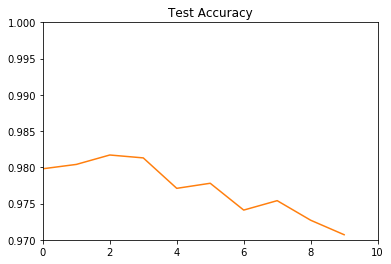

In [17]:
plt.plot(allscores)
plt.title('Test Accuracy')
plt.axis([0,10,.97, 1])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

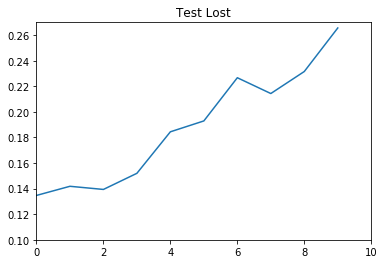

In [20]:
plt.plot(allscores)
plt.title('Test Lost')
plt.axis([0,10,0.10, 0.27])
plt.show

In [21]:
## As expected, the introduction of more noise (looped in increments of 10 from 0 to 100 above) 
## leads to higher test lost and lower test accuracy in the network.